In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
from copy import deepcopy

os.chdir('C:/Users/Utilisateur/Documents/GitHub/planktonPipeline/extract_Pulse_values')
from ffnn_functions import homogeneous_cluster_names

In [7]:
# Descriptive statistics
# Load training data
tn = pd.read_csv('train_nomenclature.csv')
tn.columns = ['Particle_class', 'label']

X = np.load('L3_FUMSECK/X_interp.npy')
y = np.load('L3_FUMSECK/y_interp.npy')
pid_list = np.load('L3_FUMSECK/pid_list_interp.npy')
seq_len_list = np.load('L3_FUMSECK/seq_len_list_interp.npy')

labels = np.argmax(y, axis = 1)

In [8]:
# Compute the quantiles
qs = np.quantile(seq_len_list, q = [0, 0.25, 0.5, 0.75, 1])

q1_mask = (seq_len_list >= qs[0]) & (seq_len_list< qs[1])
q2_mask = (seq_len_list >= qs[1]) & (seq_len_list<= qs[2])
q3_mask = (seq_len_list > qs[2]) & (seq_len_list <= qs[3])
q4_mask = (seq_len_list > qs[3]) & (seq_len_list<= qs[4])

assert((q1_mask.sum() + q2_mask.sum() + q3_mask.sum() + q4_mask.sum()) == len(seq_len_list))

seq_quant = deepcopy(seq_len_list)
seq_quant[q1_mask] = 1
seq_quant[q2_mask] = 2
seq_quant[q3_mask] = 3
seq_quant[q4_mask] = 4

pd.crosstab(seq_quant, labels)

col_0,0,1,2,3,4,5,6,7
row_0,,,,,,,,
1,0,0,0,0,114,0,211,8
2,0,19,0,10,59,147,9,210
3,0,112,8,128,40,70,0,2
4,48,89,173,43,7,3,0,0


Group number airbubble


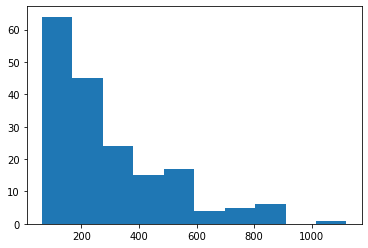

Group number cryptophyte


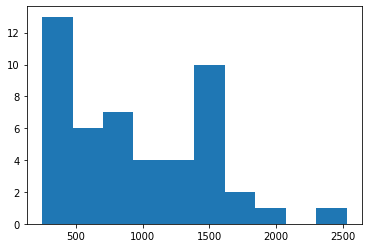

Group number microphytoplancton


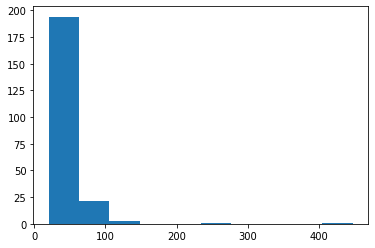

Group number nanoeucaryote


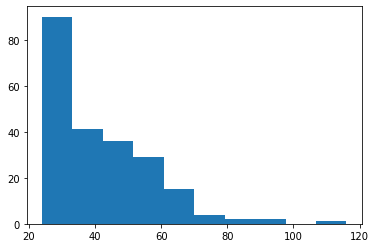

Group number noise


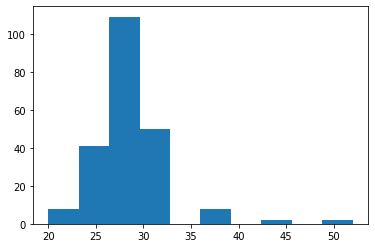

Group number picoeucaryote


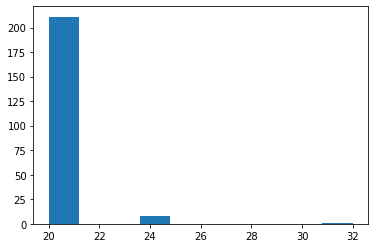

Group number prochlorococcus


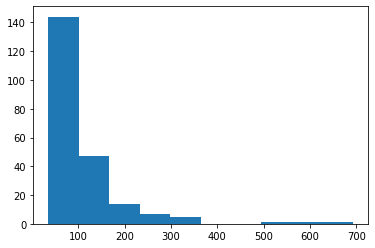

Group number synechococcus


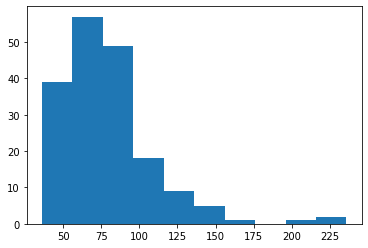

In [9]:
len_distrib = pd.DataFrame({'Particle ID': pid_list, 'length': seq_len_list, 'q': seq_quant, 'label': labels})
len_distrib = len_distrib.merge(tn)

for label, group in len_distrib.groupby('Particle_class'):
    print('Group number', label)
    plt.hist(group['length'])
    plt.show()

### First vizualisation test

#### On a new file

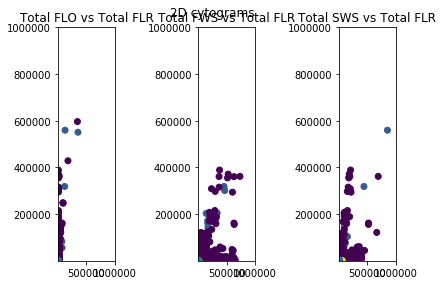

In [15]:
# Visualize the predictions

preds = pd.read_csv('C:/Users/Utilisateur/Documents/GitHub/planktonPipeline/extract_Pulse_values/FLR25 2019-12-11 08h08.csv')


fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle('2D cytograms')
ax1.scatter(preds['Total FLO'], preds['Total FLR'], c = preds['Particle_class_num'])
ax1.set_title('Total FLO vs Total FLR')
ax1.set_xlim(1, 1E6)
ax1.set_ylim(1, 1E6)


ax2.scatter(preds['Total FWS'], preds['Total FLR'], c = preds['Particle_class_num'])
ax2.set_title('Total FWS vs Total FLR')
ax2.set_xlim(1, 1E6)
ax2.set_ylim(1, 1E6)


ax3.scatter(preds['Total SWS'], preds['Total FLR'], c = preds['Particle_class_num'])
ax3.set_title('Total SWS vs Total FLR')
ax3.set_xlim(1, 1E6)
ax3.set_ylim(1, 1E6)


fig.tight_layout()

### Predicting on an already existing file

Original file

In [119]:
ground_truth = pd.read_csv('C:/Users/Utilisateur/Desktop/test_pred/L1/Labelled_Pulse6_2019-04-30 12h36.csv')

In [121]:
import scipy.integrate as it

# Reformat the data. Each obs shape is (nb_curves, seq_len)
total_fws_list = []
total_sws_list = []
total_flo_list = []
total_flr_list = []
total_curv_list = []
cluster_list = []

for pid, obs in ground_truth.groupby('Particle ID'):
    total_fws_list.append(it.trapz(obs['FWS'].astype(float)))
    total_sws_list.append(it.trapz(obs['SWS'].astype(float)))
    total_flo_list.append(it.trapz(obs['FL Orange'].astype(float)))
    total_flr_list.append(it.trapz(obs['FL Red'].astype(float)))
    total_curv_list.append(it.trapz(obs['Curvature'].astype(float)))
    cluster_list.append(list(set(obs['cluster']))[0])

In [122]:
# Format the original file
formatted_preds = pd.DataFrame({'Particle': list(set(ground_truth['Particle ID'])), 'Particle_class': cluster_list, \
                                    'Total FWS': total_fws_list, 'Total SWS': total_sws_list, \
                                    'Total FLO': total_flo_list, 'Total FLR': total_flr_list, 
                                    'Total CURV': total_curv_list})
formatted_preds.columns = ['Particle', 'cluster', 'Total FWS', 'Total SWS', 'Total FLO',
       'Total FLR', 'Total CURV']
df = homogeneous_cluster_names(formatted_preds)

Text(0, 0.5, 'FLR')

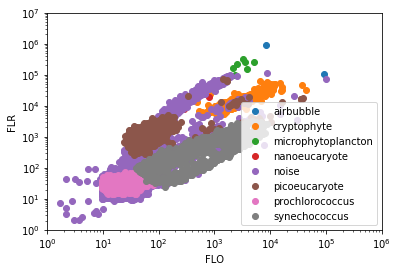

In [139]:
colors = set(df['cluster'])


for idx, row in df.groupby('cluster'):
    plt.scatter(row['Total FLO'], row['Total FLR'], 
                label=idx)

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlim(1, 1E6)
plt.ylim(1, 1E7)
plt.xlabel('FLO')
plt.ylabel('FLR')

Predictions

Text(0, 0.5, 'FLR')

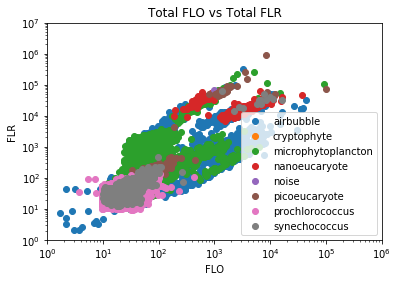

In [140]:
preds = pd.read_csv('C:/Users/Utilisateur/Desktop/test_pred/L2/FLR6 2019-04-30 12h36.csv')
colors = set(preds['Particle_class_num'])


for idx, row in preds.groupby('Particle_class'):
    plt.scatter(row['Total FLO'], row['Total FLR'], 
                label=idx)

plt.legend()
plt.title('Total FLO vs Total FLR')
plt.xscale("log")
plt.yscale("log")
plt.xlim(1, 1E6)
plt.ylim(1, 1E7)
plt.xlabel('FLO')
plt.ylabel('FLR')

### Predicting on a new file

(1, 10000000.0)

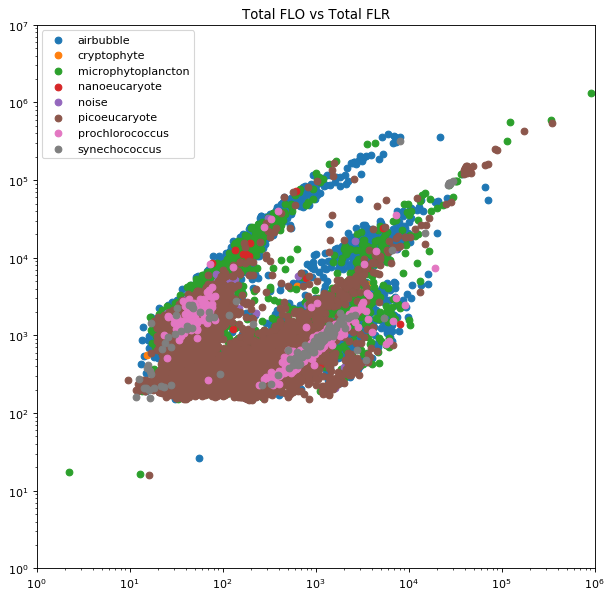

In [141]:
preds = pd.read_csv('C:/Users/Utilisateur/Desktop/test_pred/L2/FLR25 2019-12-11 08h08.csv')
colors = set(preds['Particle_class_num'])

plt.figure(figsize=(9, 9), dpi=80)
for idx, row in preds.groupby('Particle_class'):
    plt.scatter(row['Total FLO'], row['Total FLR'], 
                label=idx)

plt.legend()
plt.title('Total FLO vs Total FLR')
plt.xscale("log")
plt.yscale("log")
plt.xlim(1, 1E6)
plt.ylim(1, 1E7)

(1, 10000000.0)

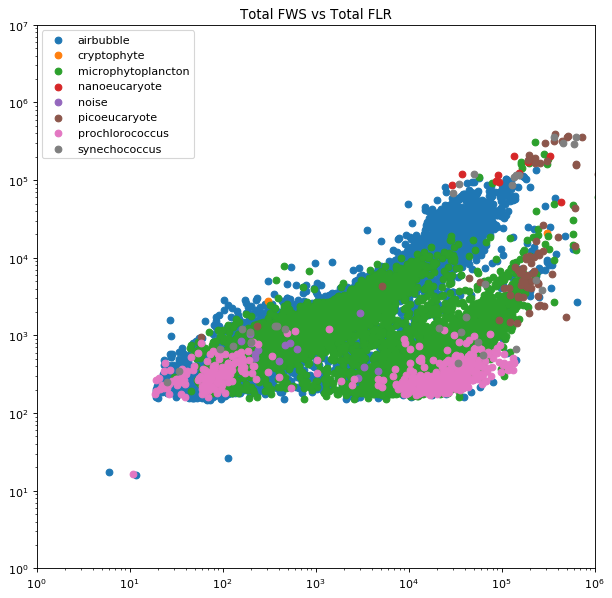

In [135]:
#preds = pd.read_csv('C:/Users/Utilisateur/Desktop/test_pred/L2/FLR25 2019-12-11 08h08.csv')
colors = set(preds['Particle_class_num'])

plt.figure(figsize=(9, 9), dpi=80)
for idx, row in preds.groupby('Particle_class'):
    plt.scatter(row['Total FWS'], row['Total FLR'], 
                label=idx)

plt.legend()
plt.title('Total FWS vs Total FLR')
plt.xscale("log")
plt.yscale("log")
plt.xlim(1, 1E6)
plt.ylim(1, 1E7)

# KNN vizualisation

In [1]:
import os 
os.chdir('C:/Users/Utilisateur/Documents/GitHub/planktonPipeline/extract_Pulse_values')

In [2]:
import pandas as pd
preds = pd.read_csv('predictions/knn_preds_train')

(1, 10000000.0)

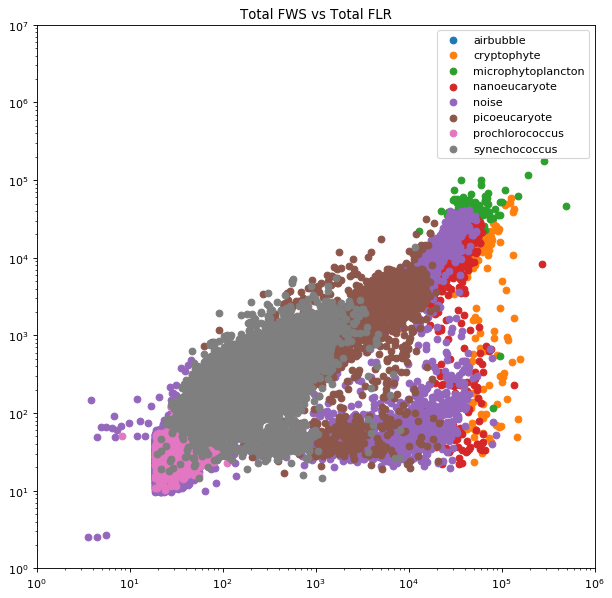

In [5]:
#preds = pd.read_csv('C:/Users/Utilisateur/Desktop/test_pred/L2/FLR25 2019-12-11 08h08.csv')

plt.figure(figsize=(9, 9), dpi=80)
for idx, row in preds.groupby('cluster'):
    plt.scatter(row['Total FWS'], row['Total FLR'], 
                label=idx)

plt.legend()
plt.title('Total FWS vs Total FLR')
plt.xscale("log")
plt.yscale("log")
plt.xlim(1, 1E6)
plt.ylim(1, 1E7)